### System Configuration

In [ ]:
from psutil import *
# This code will return the number of CPU
print("Number of CPU: ", cpu_count())
# This code will return the CPU info
!cat /proc/cpuinfo

Number of CPU:  2
processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache

In [ ]:
## Operating system
import os
print(os.name)

import platform
print(platform.system())

posix
Linux


### Mount Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
### Libararies for data pre-processing and Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
from collections import Counter

### Natural Language Processing Libraries
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import nltk
# Download necessary NLTK data files
nltk.download('stopwords')
nltk.download('wordnet')

## Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

### Machine Learning Libararies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### Evaluation Metrics Function

In [ ]:
def evaluate_model_performance(y_true, y_pred):

    metrics = {
        'accuracy': accuracy_score(y_true, y_pred),
        'f1_score': f1_score(y_true, y_pred, average='weighted'),
        'mcc': matthews_corrcoef(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average='weighted'),
        'recall': recall_score(y_true, y_pred, average='weighted')
    }

    return metrics

### Confusion Matrix Plot Function

In [ ]:
def plot_confusion_matrix(y_true, y_pred, class_names=None):
    cm = confusion_matrix(y_true, y_pred)
    if class_names is None:
        class_names = [str(i) for i in range(cm.shape[0])]

    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks and label them with the respective list entries
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names, yticklabels=class_names,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

### Data Merging Function

A function to read the json file and convert it into a dataframe

In [ ]:
path = '/content/drive/MyDrive/Email-project'

In [ ]:
def json_files_to_dataframe(directory):
    # Initialize an empty list to hold the data from each file
    data_list = []

    # Loop through each file in the directory
    for filename in os.listdir(directory):
        if filename.endswith('.json'):
            file_path = os.path.join(directory, filename)

            # Open and read the JSON file
            with open(file_path, 'r') as file:
                data = json.load(file)

                # Append the data to the list
                data_list.append(data)

    # Create a DataFrame from the list of data
    df = pd.DataFrame(data_list)
    return df

In [ ]:
## The path of the dataset
normal_path = path + '/enron_ham'
spam_path = path + '/spear_phishing'

In [ ]:
### Normal (Non-Spam) Email
normal_df = json_files_to_dataframe(normal_path)
### SPam Email
spam_df = json_files_to_dataframe(spam_path)

In [ ]:
normal_df.head()

,email_subject,email_body,id
0,Option Analysis on NG Price Book,---------------------- Forwarded by John Arnol...,32572339_1075857602061_JavaMail_evans_thyme
1,(01-154) Implementation of New NYMEX Rule 9.11...,---------------------- Forwarded by John Arnol...,20877951_1075857650163_JavaMail_evans_thyme
2,Re: Demo,yes Brian Hoskins@ENRON COMMUNICATIONS 10/05/2...,7584611_1075857597105_JavaMail_evans_thyme
3,Analyst Interviews Needed - 2/15/01,"Patti, This sounds like an opportunity to land...",31274667_1075855698684_JavaMail_evans_thyme
4,Avaya - Preparation Meeting EB4598A,Strategy meeting to prepare for the Avaya disc...,5973279_1075849627592_JavaMail_evans_thyme


### Creating label for the dataset.

### Join the 2 dataset

The Normal email and Phising Email has to be in one dataframe.

In [ ]:
### Normal Email Target
normal_df['Label'] = 'normal'

In [ ]:
### Phising Email Target
spam_df['Label'] = 'pishing'

In [ ]:
data = pd.concat([normal_df, spam_df]).reset_index(drop=True)

In [ ]:
## Drop insignificant features
data = data.drop(['id','sender_name'], axis=1)

In [ ]:
len(data)

3334

### Data Understanding

In [ ]:
data.head()

,email_subject,email_body,Label
0,Option Analysis on NG Price Book,---------------------- Forwarded by John Arnol...,normal
1,(01-154) Implementation of New NYMEX Rule 9.11...,---------------------- Forwarded by John Arnol...,normal
2,Re: Demo,yes Brian Hoskins@ENRON COMMUNICATIONS 10/05/2...,normal
3,Analyst Interviews Needed - 2/15/01,"Patti, This sounds like an opportunity to land...",normal
4,Avaya - Preparation Meeting EB4598A,Strategy meeting to prepare for the Avaya disc...,normal


In [ ]:
data.shape

(3334, 3)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3334 entries, 0 to 3333
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   email_subject  3334 non-null   object
 1   email_body     3334 non-null   object
 2   Label          3334 non-null   object
dtypes: object(3)
memory usage: 78.3+ KB


In [ ]:
data['Label'].value_counts(normalize=True)*100

,proportion
Label,
normal,89.982004
pishing,10.017996


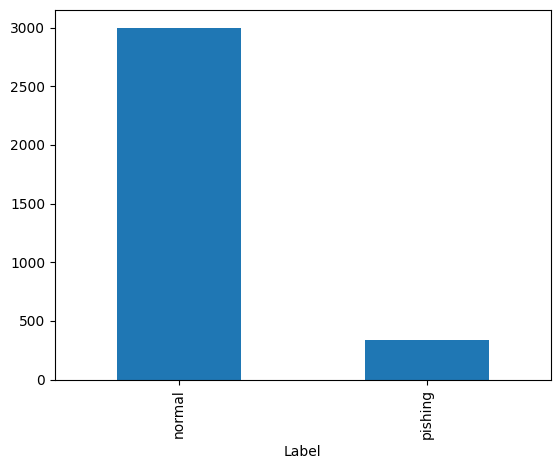

In [ ]:
data['Label'].value_counts().plot(kind='bar');

### Data Pre-processing

In [ ]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [ ]:
top_10_words = ["subject", "cc", "please", "phillip", "pm", "email", "k", "forwarded", "would", "john"]
underscore_patterns = ['____', '_____', '______']

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove punctuation, special characters, and numbers
    text = re.sub(r'\n', ' ', text)  # Replace newline characters with space
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)  # Remove numbers
    # Remove underscore patterns
    for pattern in underscore_patterns:
        text = text.replace(pattern, '')
    # Remove stopwords and top 10 words
    text = ' '.join([word for word in text.split() if word not in stop_words and word not in top_10_words])
    # Remove repeated words
    text = ' '.join(sorted(set(text.split()), key=text.split().index))
    # Lemmatize words
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

In [ ]:
data.head(2)

,email_subject,email_body,Label
0,Option Analysis on NG Price Book,---------------------- Forwarded by John Arnol...,normal
1,(01-154) Implementation of New NYMEX Rule 9.11...,---------------------- Forwarded by John Arnol...,normal


In [ ]:
data['clean_email_body'] = data['email_body'].apply(preprocess_text)

In [ ]:
data.head()

,email_subject,email_body,Label,clean_email_body
0,Option Analysis on NG Price Book,---------------------- Forwarded by John Arnol...,normal,arnoldhouect rudi zipter arnoldhouectect vladi...
1,(01-154) Implementation of New NYMEX Rule 9.11...,---------------------- Forwarded by John Arnol...,normal,arnoldhouect soblandercarrfutcom implementatio...
2,Re: Demo,yes Brian Hoskins@ENRON COMMUNICATIONS 10/05/2...,normal,yes brian hoskinsenron communication arnoldhou...
3,Analyst Interviews Needed - 2/15/01,"Patti, This sounds like an opportunity to land...",normal,patti sound like opportunity land couple analy...
4,Avaya - Preparation Meeting EB4598A,Strategy meeting to prepare for the Avaya disc...,normal,strategy meeting prepare avaya discussion janu...


### Top 10 words

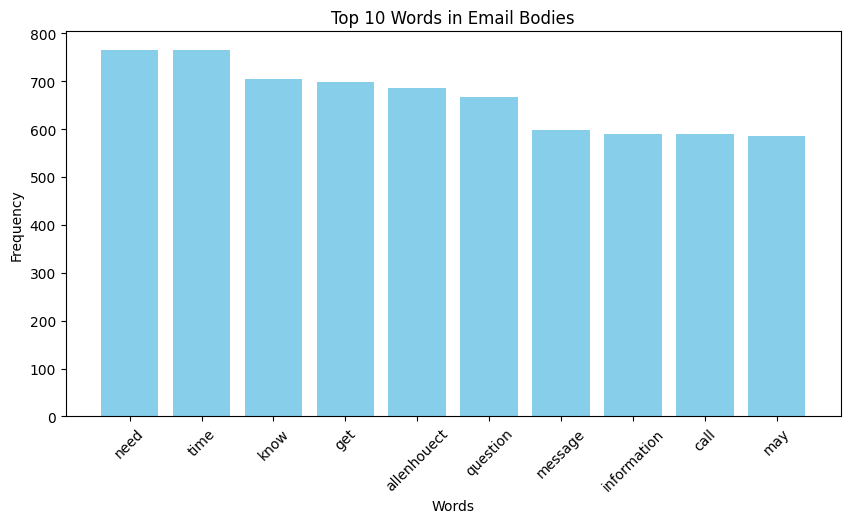

In [ ]:
# Combining all email bodies into a single string
all_text = ' '.join(data['clean_email_body'])
# Splitting the text into words
words = all_text.split()

# Counting the frequency of each word
word_counts = Counter(words)
# Getting the top 10 most common words
top_10_words = word_counts.most_common(10)
words, counts = zip(*top_10_words)

# Creating the bar chart
plt.figure(figsize=(10, 5))
plt.bar(words, counts, color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Words in Email Bodies')
plt.xticks(rotation=45)
plt.show()

### Data Transformation

In [ ]:
data['Label'] = data['Label'].replace(to_replace=['normal', 'pishing'], value=[0, 1])

In [ ]:
data_new = data[['clean_email_body', 'Label']]

### Cross Validation

In [ ]:
X = data_new['clean_email_body']
y = data_new['Label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2333,)
(1001,)
(2333,)
(1001,)


### Bag of Words using TF-IDF

In [ ]:
tfv = TfidfVectorizer(min_df=5,  max_features=None,
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 4), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')

In [ ]:
# Fitting TF-IDF to both training and test sets
tfv.fit(X_train)
X_train_tfv =  tfv.transform(X_train)
X_test_tfv = tfv.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


### Logistics Regression Model

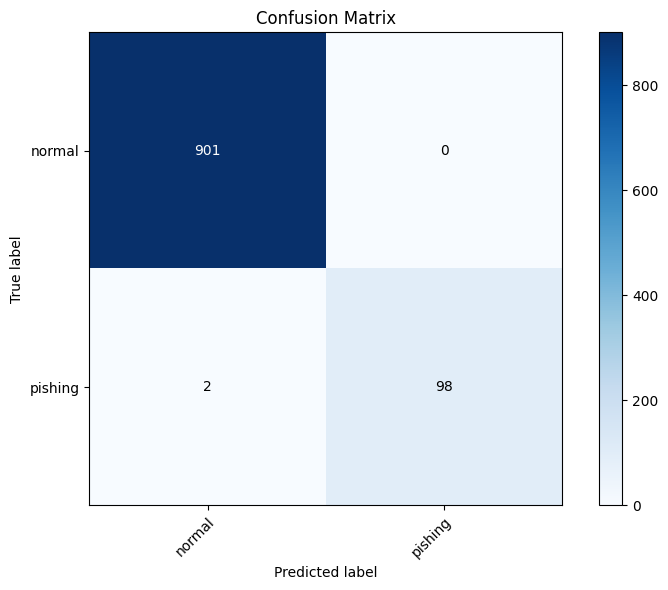

In [ ]:
lr_model = LogisticRegression() #intialize the logistic regression model
lr_model.fit(X_train_tfv, y_train)# fit the logistic regression model to the training data
predictions = lr_model.predict(X_test_tfv) # make prediction on the test data
lr_eval = evaluate_model_performance(y_test, predictions)# evaluate the performance of the model
plot_confusion_matrix(y_test, predictions, class_names=['normal', 'pishing']) ## Confusion Matrix (TP, FP, FN, TN)

The confusion shows that we have the following:

True Positive (TP): 901 TP means the model is able to predict that the email is normal and in actual they are normal.

False Positive (FP): 0 FP means the model is not mistakenly actual normal email to be a pishing email.

False Negative (FN): 2 FN means the model mistakenly predict the label normal, which in actual they are pishing email.

True Negative (TN): 98 means the model is able to predict that the email is to be pishing and in actual they are pishing.

**Note**

We just lose 2 predictions to the False Negative (i.e 2 misclassified pishing email to be normal, which they should in actual belong to the pishing email).

### Naive Bayes

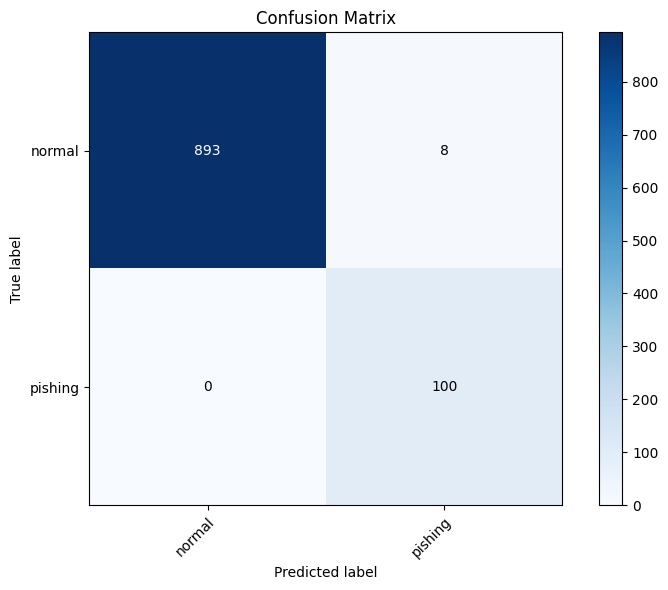

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_tfv, y_train)
predictions = nb_model.predict(X_test_tfv)
nb_eval = evaluate_model_performance(y_test, predictions)
plot_confusion_matrix(y_test, predictions, class_names=['normal', 'pishing']) ## The TP, FP, FN, TN

### Decision Tree

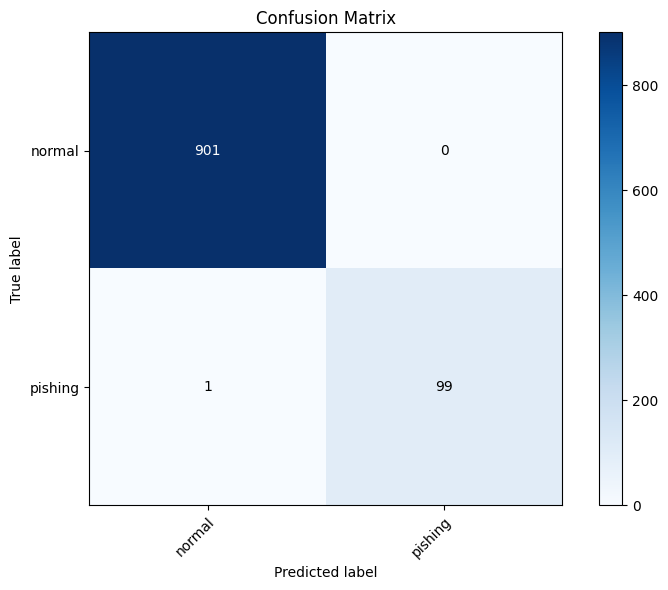

In [ ]:
dtr_model = DecisionTreeClassifier(random_state=101)
dtr_model.fit(X_train_tfv, y_train)
predictions = dtr_model.predict(X_test_tfv)
dtr_eval = evaluate_model_performance(y_test, predictions)
plot_confusion_matrix(y_test, predictions, class_names=['normal', 'pishing']) ## The TP, FP, FN, TN

### Random Forest

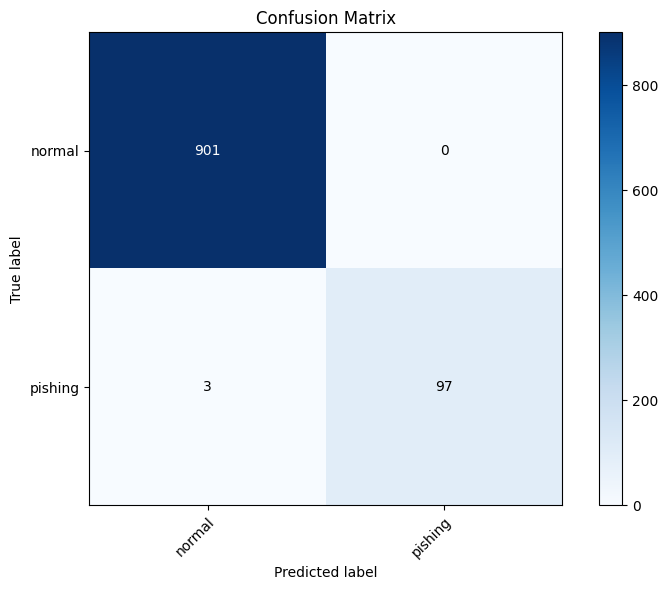

In [ ]:
rf_model = RandomForestClassifier(random_state=0, max_depth=7) ## Restricting the Max depth to handle the Model overfitting
rf_model.fit(X_train_tfv, y_train)
predictions = rf_model.predict(X_test_tfv)
rf_eval = evaluate_model_performance(y_test, predictions)
plot_confusion_matrix(y_test, predictions, class_names=['normal', 'pishing']) ## The TP, FP, FN, TN

### Xgboost

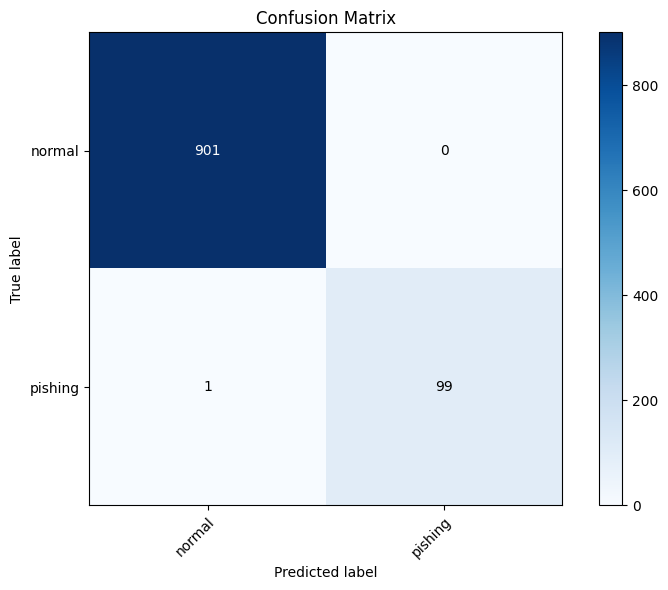

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_tfv, y_train)
predictions = xgb_model.predict(X_test_tfv)
xgb_eval = evaluate_model_performance(y_test, predictions)
plot_confusion_matrix(y_test, predictions, class_names=['normal', 'pishing']) ## The TP, FP, FN, TN

### LightGbm

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Info] Number of positive: 234, number of negative: 2099
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040594 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 35514
[LightGBM] [Info] Number of data points in the train set: 2333, number of used features: 2016
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.100300 -> initscore=-2.193895
[LightGBM] [Info] Start training from score -2.193895
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

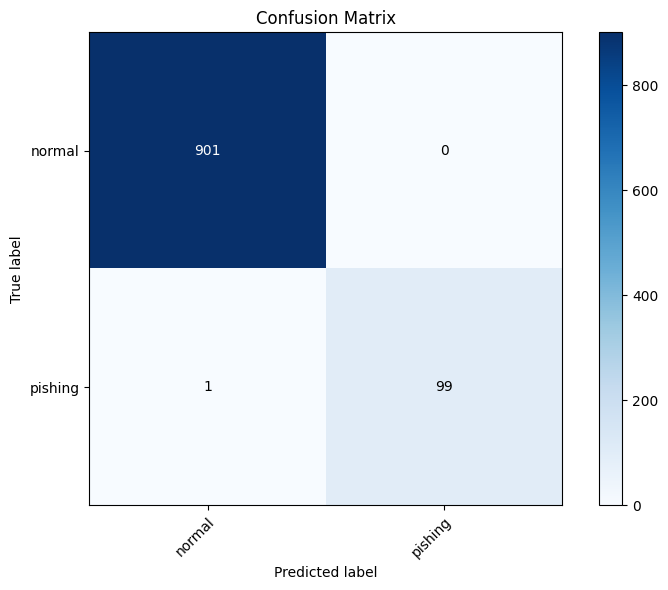

In [ ]:
lgb_model = lgb.LGBMClassifier(silent = True)
lgb_model.fit(X_train_tfv, y_train)
predictions = lgb_model.predict(X_test_tfv)
lgb_eval = evaluate_model_performance(y_test, predictions)
plot_confusion_matrix(y_test, predictions, class_names=['normal', 'pishing']) ## The TP, FP, FN, TN

### Result Presentation

In [ ]:
result = pd.DataFrame([lr_eval, nb_eval, dtr_eval, rf_eval, xgb_eval, lgb_eval], index=['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM'])

In [ ]:
result = result.reset_index().rename(columns={'index': 'Model'})

In [ ]:
result

,Model,accuracy,f1_score,mcc,precision,recall
0,Logistic Regression,0.998002,0.997993,0.988853,0.998006,0.998002
1,Naive Bayes,0.992008,0.992144,0.957969,0.992600,0.992008
2,Decision Tree,0.999001,0.998999,0.994436,0.999002,0.999001
3,Random Forest,0.997003,0.996983,0.983250,0.997013,0.997003
4,XGBoost,0.999001,0.998999,0.994436,0.999002,0.999001
5,LightGBM,0.999001,0.998999,0.994436,0.999002,0.999001


In [ ]:
result

,Model,accuracy,f1_score,mcc,precision,recall
0,Logistic Regression,0.998002,0.997993,0.988853,0.998006,0.998002
1,Naive Bayes,0.992008,0.992144,0.957969,0.992600,0.992008
2,Decision Tree,0.999001,0.998999,0.994436,0.999002,0.999001
3,Random Forest,0.997003,0.996983,0.983250,0.997013,0.997003
4,XGBoost,0.999001,0.998999,0.994436,0.999002,0.999001
5,LightGBM,0.999001,0.998999,0.994436,0.999002,0.999001


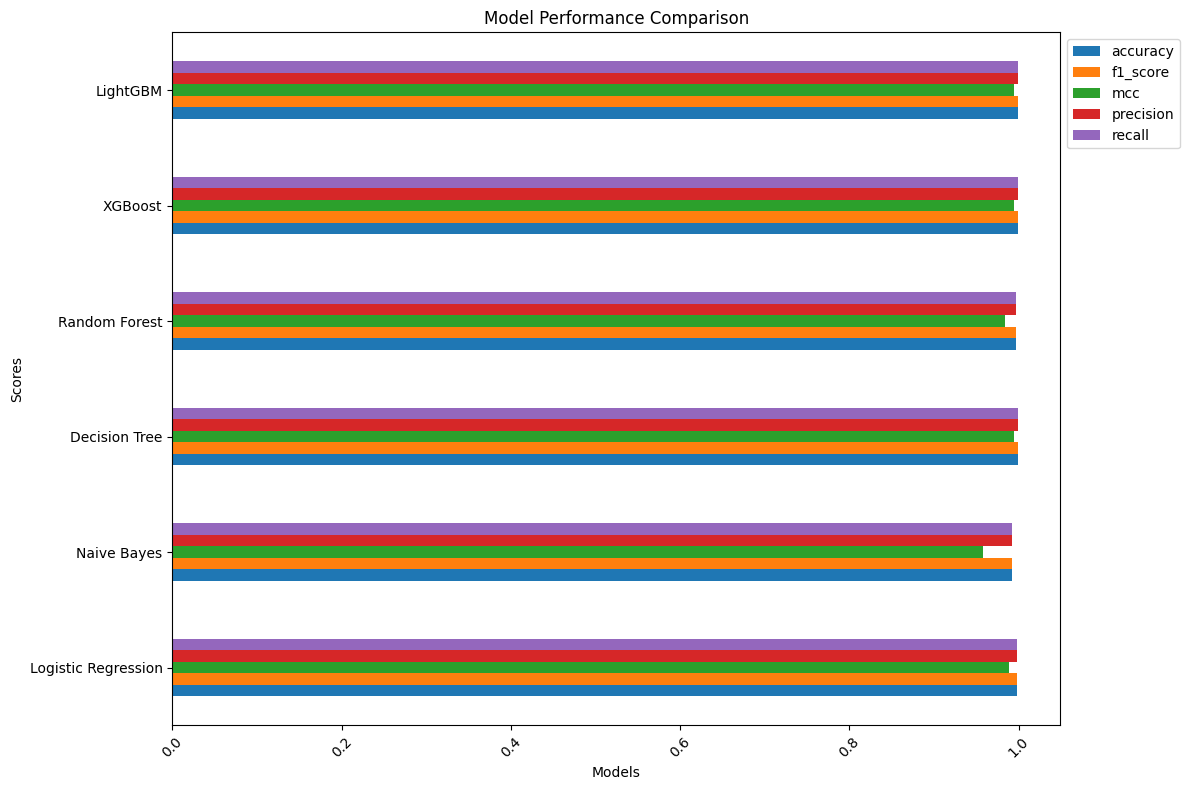

In [ ]:
result.set_index('Model').plot(kind='barh', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### I created a small Email Prompt to show whether the email is Phising or Normal.

In [ ]:
import joblib

In [ ]:
def classify_email(model_path, vectorizer_path, email_text):
    """
    Classifies an input email text to determine if it is a phishing email or not.

    Parameters:
    model_path (str): Path to the saved model.
    vectorizer_path (str): Path to the saved vectorizer.
    email_text (str): The email text to be classified.

    Returns:
    str: 'Phishing' if the email is classified as phishing, 'Not Phishing' otherwise.
    """
    # Load the saved model and vectorizer
    model_saved = joblib.load(model_path)
    vector_saved = joblib.load(vectorizer_path)

    # Preprocess the text
    clean_sample_text = preprocess_text(email_text)

    # Transform the text using the vectorizer to numbers
    sample_vec = vector_saved.transform([clean_sample_text])

    # Predict using the model
    prediction = model_saved.predict(sample_vec)

    # Map the prediction to a human-readable label
    if prediction[0] == 1:
        return 'Phishing'
    else:
        return 'Normal'

### save the model

In [ ]:
joblib.dump(lgb_model, "lgb_model.joblib")
joblib.dump(tfv, "tfv.joblib")

['tfv.joblib']

In [ ]:
joblib.dump(xgb_model, "xgb_model.joblib")

['xgb_model.joblib']

In [ ]:
model_saved = joblib.load("lgb_model.joblib")
vector_saved = joblib.load("tfv.joblib")

### Interface Email

### Gradio

In [ ]:
#%%capture
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [ ]:
import gradio as gr

In [ ]:
# Load your ML model and vectorizer
model_path = '/content/lgb_model.joblib'
vectorizer_path = '/content/tfv.joblib'

model = joblib.load(model_path)
vectorizer = joblib.load(vectorizer_path)

def predict(email_text):
    try:
        # Preprocess the input
        email_vector = vectorizer.transform([email_text])
        # Predict using the loaded model
        prediction = model.predict(email_vector)
        if prediction[0] == 1:
            return 'Phishing'
        else:
            return 'Normal'
    except Exception as e:
        # Print the exception and return it as a string for debugging
        print(f"Error: {e}")
        return f"Error: {e}"

# Custom CSS for black background
custom_css = """
body {
    background-color: black !important;
    color: white !important;
}
.gradio-container {
    background-color: black !important;
    color: white !important;
}
textarea, input, .gr-button, .gr-button-lg, .gr-button-primary {
    background-color: #333 !important;
    color: white !important;
    border: 1px solid #555 !important;
}
.gr-button-lg, .gr-button-primary {
    background-color: #444 !important;
    color: white !important;
}
"""

# Create the Gradio interface
interface = gr.Interface(fn=predict,
                         inputs=gr.Textbox(lines=5, placeholder="Enter the email text here..."),
                         outputs="text",
                         title="Email Text Classifier",
                         css=custom_css)

# Launch the interface with the shareable link
if __name__ == "__main__":
    interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0c0927eb4a0b54101b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
